# Monte Carlo Markov Chain

## Christina Lee

## Category: Numerics

### Monte Carlo Physics Series
* [Monte Carlo: Calculation of Pi](../Numerics_Prog/Monte-Carlo-Pi.ipynb)
* [Monte Carlo Markov Chain](../Numerics_Prog/Monte-Carlo-Markov-Chain.ipynb)
* [Monte Carlo Ferromagnet](../Prerequisites/Monte-Carlo-Ferromagnet.ipynb)
* [Phase Transitions](../Prerequisites/Phase-Transitions.ipynb)

### Intro

If you didn't check it out already, take a look at the post that introduces using random numbers in calculations.  Any such simulation is a <i>Monte Carlo</i> simulation.  The most used kind of Monte Carlo simulation is a <i>Markov Chain</i>, also known as a random walk, or drunkard's walk.  A Markov Chain is a series of steps where
* each new state is chosen probabilistically
* the probabilities only depend on the current state (no memory)

Imagine a drunkard trying to walk.  At any one point, they could progress either left or right rather randomly.  Also, just because they had been traveling in a straight line so far does not guarantee they will continue to do.  They've just had extremely good luck.  

We use Markov Chains to <b>approximate probability distributions</b>.  

To create a good Markov Chain, we need
* <b> Ergodicity</b>: All states can be reached
* <b> Global Balance</b>: A condition that ensures the proper equilibrium distribution

### The Balances

Let $\pi_i$ be the probability that a particle is at site $i$, and $p_{ij}$ be the probability that a particle moves from $i$ to $j$.  Then Global Balance can be written as,

\begin{equation}
\sum\limits_j \pi_i p_{i j} = \sum\limits_j \pi_j p_{j i} \;\;\;\;\; \forall i.
\end{equation}

In non-equation terms, this says the amount of "chain" leaving site $i$ is the same as the amount of "chain" entering site $i$ for every site in equilibrium.  There is no flow.  

Usually though, we actually want to work with a stricter rule than Global Balance, <b> Detailed Balance </b>, written as

\begin{equation}
\pi_i p_{i j} = \pi_j p_{j i}.
\end{equation}

Detailed Balance further constricts the transition probabilities we can assign and makes it easier to design an algorithm. Almost all MCMC algorithms out there use detailed balance, and only lately have certain applied mathematicians begun looking at breaking detailed balance to increase efficiency in certain classes of problems. 

### Today's Test Problem

I will let you know now; this might be one of the most powerful numerical methods you could ever learn.  I was going to put down a list of applications, but the only limit to such a list is your imagination.  

Today though, we will not be trying to predict stock market crashes, calculate the PageRank of a webpage, or calculate the entropy a quantum spin liquid at zero temperature.  We just want to calculate an uniform probability distribution, and look at how Monte Carlo Markov Chains behave.

* We will start with an $l\times l$ grid

* Our chain starts somewhere in that grid

* We can then move up, down, left or right equally 

* If we hit an edge, we come out the opposite side <i>(toroidal boundary conditions)</i>

<b>First question!</b> Is this ergodic?

Yes! Nothing stops us from reaching any location.

<b>Second question!</b> Does this obey detailed balance?

Yes!  In equilibrium, each block has a probability of $\pi_i = \frac{1}{l^2}$, and can travel to any of its 4 neighbors with probability of $p_{ij} = \frac{1}{4}$.  For any two neighbors
\begin{equation}
\frac{1}{l^2}\frac{1}{4} = \frac{1}{l^2}\frac{1}{4},
\end{equation}
and if they are not neighbors,
\begin{equation}
0 = 0.
\end{equation}

In [1]:
using Statistics
using Plots
gr()

Plots.GRBackend()

In [2]:
# This is just the equivalent of `mod`
# for using in an array that indexes from 1.   
function armod(i,j)
    return (mod(i-1+j,j)+1)  
end

armod (generic function with 1 method)

In [3]:
# input the size of the grid
l=5;
n=l^2;

In [4]:
function Transition(i)
    #randomly chose up, down, left or right
    d=rand(1:4);
    if d==1 #if down
        return armod(i-l,n);
        
    elseif d==2 #if left
        row=convert(Int,floor((i-1)/l));
        return armod(i-1,l)+l*row;
        
    elseif d==3 #if right
        row=convert(Int,floor((i-1)/l));
        return armod(i+1,l)+l*row;
        
    else  # otherwise up
        return armod(i+l,n);
    end    
end

Transition (generic function with 1 method)

In [5]:
# The centers of blocks.
# Will be using for pictoral purposes

pos=zeros(Float64,2,n);
pos[1,:]=[floor((i-1)/l) for i in 1:n].+0.5;
pos[2,:]=[mod(i-1,l) for i in 1:n].+0.5;

In [6]:
# How many timesteps
tn=2000;

# Array of timesteps
ti=Array{Int64,1}()
# Array of errors
err=Array{Float64,1}()

# Stores current location, initialized randomly
current=rand(1:n);
# Stores last location, used for pictoral purposes
last=current;

#Keeps track of where chain went
Naccumulated=zeros(Int64,l,l);

# put in our first point
# can index 2d array as 1d
Naccumulated[current]+=1;

In [7]:
for ii in 1:tn
    
    last=current;
    # Determine the new point
    current=Transition(current);
    Naccumulated[current]+=1;
    
    # add new time steps and error points
    push!(ti,ii)
    push!(err,std(Naccumulated/ii))
    
end

When I was using an old version and pyplot I created this video of the state at each time point. https://www.youtube.com/watch?v=gxX3Fu1uuCs 

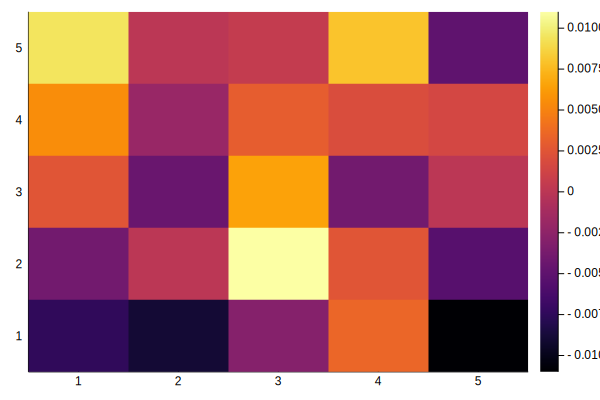

In [8]:
heatmap(Naccumulated/tn .- 1/l^2)

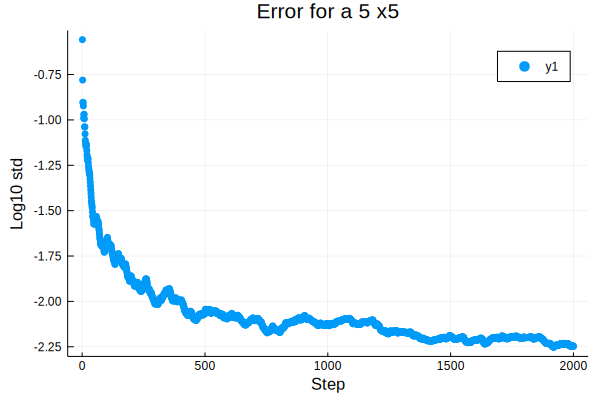

In [9]:
scatter(ti,log10.(err), markerstrokewidth=0)

plot!(xlabel="Step"
    ,ylabel="Log10 std"
    ,title="Error for a $l x$l")

So, after running the above code and trying to figure out how it works (mostly plotting stuff), go back and study some properties of the system.

* How long does it take to forget it's initial position?

* How does the behaviour change with system size?

* How long would you have to go to get a certain accuracy? (especially if you didn't know what distribution you where looking for)

So hopefully you enjoyed this tiny introduction to an incredibly rich subject.  Feel free to explore all the nooks and crannies to really understand the basics of this kind of simulation, so you can gain more control over the more complex simulations.  

Monte Carlo simulations are as much of an art as a science.  You need to live them, love them, and breathe them till you find out exactly why they are behaving like little kittens that can finally jump on top of your countertops, or open your bedroom door at 1am. 

For all their misbehaving, you love the kittens anyway.


@ARTICLE{1970Bimka..57...97H,
    title = "{Monte Carlo Sampling Methods using Markov Chains and their Applications}",
  journal = {Biometrika, Vol.~57, No.~1, p.~97-109, 1970},
     year = 1970,
    month = apr,
   volume = 57,
    pages = {97-109},
      doi = {10.1093/biomet/57.1.97},
   adsurl = {http://adsabs.harvard.edu/abs/1970Bimka..57...97H},
  adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}